## Linear Regression With Normal Equation:
### We Use Linear Regression For Predict Value That is Continusely

### to find value of theta that minimize the cost function there is a closed-form solution :

### this is formula of normal equation --> np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 

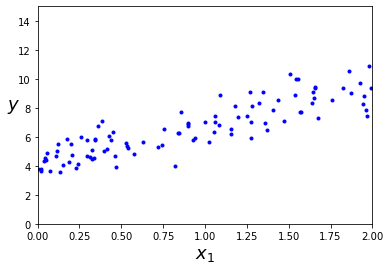

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.19305494]), array([[2.64842654]]))

## Linear Regression Using Batch Gradient Descent:

### Gradient Decent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems.
### the general idea minimize the cost function.
### gradient decent has an important parameter size of step or learning rate if the learning rate to small then the algorithm reach the global minimum but will take long time, although if the learning rate is to high, maybe you jump accross the global minimum and far from point
### when you want to use gradient decent you should ensure all feaature in same scale 


## Batch Gradient :
### it use the whole batch of training data at every step as a result it is terribly slow down on very large training sets
###    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
### to find good learning rate you can use grid search 


## Stochastic Gradient Decent:
### the main problem of batch is use whole trainig set to compute the gradient decent the opposite site is stochastic gradient decent picks a random instances in the training set at every step and compute gradient only on that single instance.
### on the other hand , stochastic much regular than batch and instead of decreasing until it reach the minimum, the cost function will become up and down , decreasing only the average
### to perform Linear Regression using SGD use SGDRegressor 

In [3]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=0.1
                      )
sgd_reg.fit(x, y)
sgd_reg.intercept_, sgd_reg.coef_

C:\Users\Pishtaz\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(array([4.22842937]), array([2.71335474]))

## Mini-Batch-Gradient Decent:
### compute the gradient on small random sets of instances 
### coparison of algorithms for Linear Regression:
### algorithm ------large m ------- out_of_core_support-----scaling reequired
#### SVD--------------------------------                fast ----------------------------No -------------------------- No
#### Batch Gd ------------------- slow---------------------------no------------------------------------------------------------yes
#### SGD ------------------------- fast ------------------------------ yes ------------------------------------------ yes 
#### Mini Batch -------------------------- fast ---------------------------------- yes------------------------------ yes

##### all algorithms they end up near the minum, but batch GD stop actually at minimum, while both SGD and Mini Batch continue to walk around   but don't forgot GD is slower than SGD and Mini Batch 

## Polynomial Regression:
### what if our data is more complex than a line we should use polynomial to fit the data that not linearly

In [12]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x ** 2 +x+ 2 + np.random.randn(m, 1)

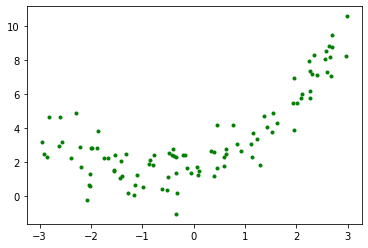

In [5]:
plt.plot(x, y, 'g.')
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
polynomi = PolynomialFeatures(degree=5, include_bias=False)
x_poly = polynomi.fit_transform(x)
x_poly
# x_poly contain orginal feature of x plus the square of this feature
#### Tip : High Degree Is Tent To Be Overfit , Although the Linear Is Tent To Be Underfiting 

array([[ 1.54789696e+00,  2.39598501e+00,  3.70873792e+00,
         5.74074416e+00,  8.88608046e+00],
       [-2.21731143e+00,  4.91646998e+00, -1.09013451e+01,
         2.41716770e+01, -5.35961358e+01],
       [-2.01490898e+00,  4.05985820e+00, -8.18024474e+00,
         1.64824486e+01, -3.32106336e+01],
       [-1.14988266e+00,  1.32223014e+00, -1.52040951e+00,
         1.74829254e+00, -2.01033128e+00],
       [ 1.11117692e+00,  1.23471416e+00,  1.37198588e+00,
         1.52451905e+00,  1.69401039e+00],
       [ 8.52271469e-01,  7.26366657e-01,  6.19061578e-01,
         5.27608521e-01,  4.49665689e-01],
       [-7.64779502e-01,  5.84887687e-01, -4.47310114e-01,
         3.42093606e-01, -2.61626178e-01],
       [ 2.27359005e+00,  5.16921172e+00,  1.17526683e+01,
         2.67207498e+01,  6.07520310e+01],
       [ 1.96185565e+00,  3.84887757e+00,  7.55094220e+00,
         1.48138586e+01,  2.90626521e+01],
       [-1.66326867e+00,  2.76646267e+00, -4.60137069e+00,
         7.65331571e+00

In [7]:
reg = LinearRegression()
reg.fit(x_poly, y)

LinearRegression()

In [8]:
reg.intercept_,reg.coef_

(array([1.70649176]),
 array([[ 8.46873150e-01,  5.61253215e-01,  1.65165355e-03,
         -2.01739595e-04,  2.50218902e-03]]))

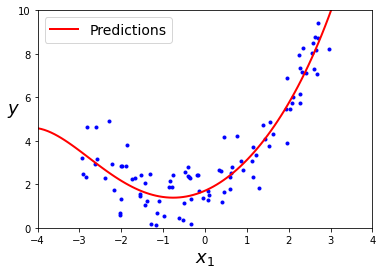

In [9]:
x_new=np.linspace(-4, 4, 100).reshape(100, 1)
x_new_poly = polynomi.transform(x_new)
y_new = reg.predict(x_new_poly)
plt.plot(x, y, "b.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-4, 4, 0, 10])
plt.show()

## To See Which Degree Is Better:

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
best_score = 0
best_degree = 0

degree = [2,3,4,5,6,7,8,9,10]
for dg in degree:
    polynomi = PolynomialFeatures(degree=dg)
    x_p = polynomi.fit_transform(x)
    polynomial_regressor = LinearRegression()
    polynomial_regressor.fit(x_p, y)
    scores = cross_val_score(polynomial_regressor, x_p, y, cv=5) # Change k-fold cv value here
    if max(scores) > best_score:
        best_score= max(scores)
        best_degree = dg


In [11]:
best_degree

3

### if you perform high-degree polynomial regression you will likely fit the training data much better than with plain linear regression 
### TIP : pay attention if use high-degree overfiting occure while the linear model is underfiting 


## How Underestand Model Is Overfit Or Underfit ?

### first way : we can use cross-validation to get an estimate of model's generalizaion performance, if our model performs well on training data but generalize poorly according to the cross-validation metrics,then model is overfiting, if performs poorly on both then this model is underfiting


### second way: look at the learning curves : these are plots od model's performance on training set

## if your model underfiting adding more example will not help you you need more complex model or come up better feature 

### Ridge is good as default ,but if you suspect than only few feature are useful, you shoud prefer lasso or elastic because they tend to reduce the usless features'weights down to zero, in general elastics prefer over lasso because lasso may behave errativally when number of fetures is greater than the number of instance
### elastic net --> middle ground between lasso and ridge the regularization by R when R=0 in ridge and when R=1 lasoo
### from sklearn.linear_model import Lasso, ElasticNet, Ridge
### Ridge(alpha=1, solver='cholesky')
### Lasso(alpha=0.1)
### ElasticNet(alpha=0.1, l1_ratio=0.5) it's better to close to 1